<a href="https://colab.research.google.com/github/lkelleher5/Bank-Networks-and-Contagion/blob/main/Bank_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install EoN

Must run both above and below lines to work

In [ ]:
pip install 'networkx<2.7'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Banks.csv to Banks (1).csv


This constructs the network using data from the CSV

In [ ]:
#@title Network
import pandas as pd
import io
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

x = pd.read_csv(io.BytesIO(uploaded['Banks.csv']))
xlist = x.to_numpy()
G = nx.Graph()
lend = 0
c = 40000
value = 0
totalasset = 0

for i in range(len(x)):
  z = 0
  adi = 0
  ldi = 0
  adj = 0
  ldj = 0
  for j in range(1,199):
    adi = int(xlist[i][10]) - (int(xlist[i][10])*(int(xlist[i][6])/int(xlist[i][10])))
    ldi = abs(int(xlist[i][12]) - int(xlist[i][10]))
    adj = int(xlist[j][10]) - (int(xlist[j][10])*(int(xlist[j][6])/int(xlist[j][10])))
    ldj = abs(int(xlist[j][12]) - int(xlist[j][10]))
    ai = adi/ldj
    lj = ldj/adi
    q = max(ai,lj)
    n = np.arange(0,1,0.01)
    m = np.arange(0,100)
    k = np.random.choice(m)
    g = np.random.choice(n)
    if k <= q:
      if (int(xlist[i][10]) - int(xlist[j][12]))>0:
        lend += 1
      totalasset += (adi + ldi)
      if (-c*lend)-totalasset < value:
        w = int(xlist[i][10])/int(xlist[j][10])
        G.add_edge(i, j, weight = w)
        value += (-c*lend)-totalasset
      else:
        if value*k > value*g:
          w = int(xlist[i][10])/int(xlist[j][10])
          G.add_edge(i, j, weight = w)
          value += (-c*lend)-totalasset

edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G)
labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

print(labels)
print(len(labels))
plt.figure(figsize=(40,40))
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=edgewidth, node_size=500)
nx.draw_networkx_labels(G, pos, labels)
plt.axis('off')
G.number_of_nodes()
print(nx.degree_assortativity_coefficient(G))

Uses EoN package to simulate a predetermined beta in a visually appealing way

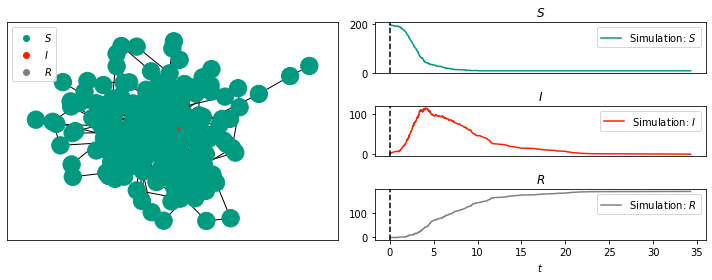

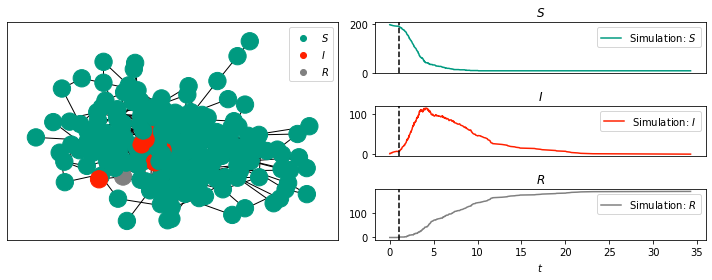

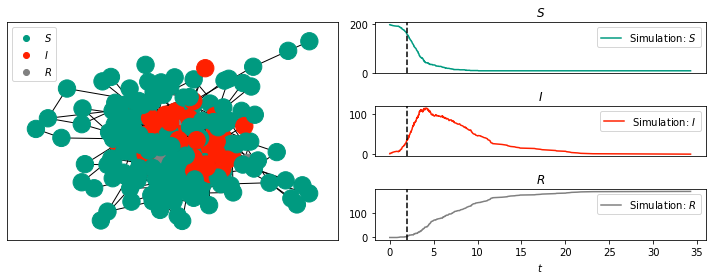

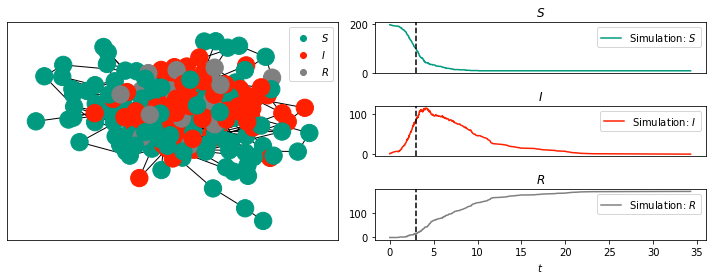

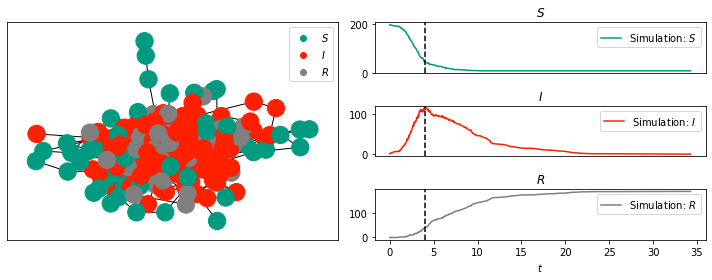

In [ ]:
#@title EoN Beta 0.5
import EoN

gamma = 0.2
beta = 0.5
r_0 = beta/gamma
N = 200
I0 = 1
R0 = 0
S0 = N - I0 -R0

sim = EoN.Gillespie_SIR(G, tau = beta, gamma=gamma, initial_infecteds = labels[1], transmission_weight = 'weight', return_full_data=True)

for i in range (0,5,1):
  sim.display(time=i)

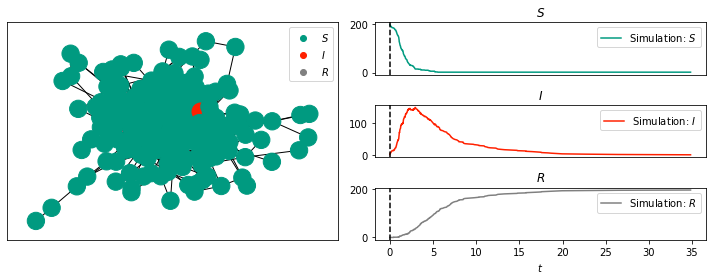

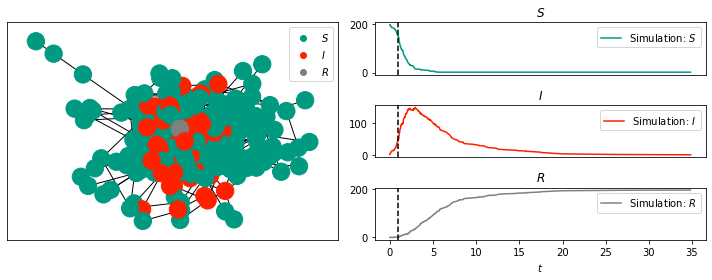

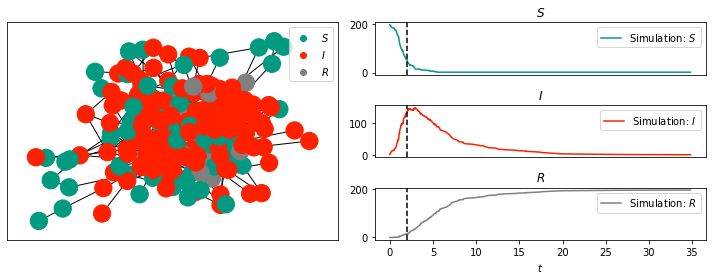

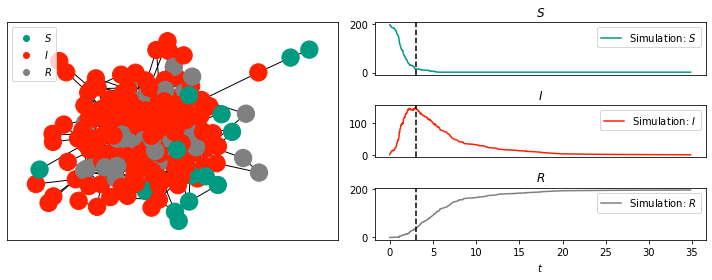

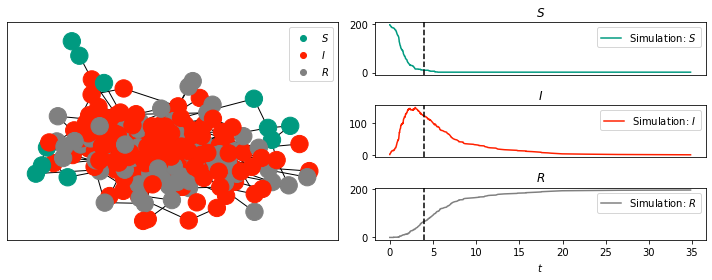

In [ ]:
#@title EoN Beta 0.8
import EoN

gamma = 0.2
beta = 0.8
r_0 = beta/gamma
N = 200
I0 = 1
R0 = 0
S0 = N - I0 -R0

sim = EoN.Gillespie_SIR(G, tau = beta, gamma=gamma, initial_infecteds = labels[1], transmission_weight = 'weight', return_full_data=True)

for i in range (0,5,1):
  sim.display(time=i)

SIR model for running multiple simulations

In [ ]:
#@title SIR
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

def epi_sim(A, j):
  N = len(labels)
  dt = 0.1
  g = 1
  T = 200
  S = np.ones([N,T])
  I = np.zeros([N,T])
  R = np.zeros([N,T])
  S[j, 0] = 0
  I[j, 0] = 1

  for x in range(5,15,2):
    b = x/10
    for t in range(1, 200):
      S[:,t] = S[:,t-1]
      I[:,t] = I[:,t-1]
      R[:,t] = R[:,t-1]
      for i in range(N):
        if S[i,t-1] == 1:
          n = 0
          for j in range(N):
            n += A[i,j]*I[j,t-1]
          if np.random.rand() < (1-(math.e**-(dt*n*b))):
              I[i,t]=1
              S[i,t]=0
        elif I[i,t-1] == 1:
          if np.random.rand() < (1-(math.e**-(dt*g))):
            R[i,t]=1
            I[i,t]=0
  return I

Each of the below cells runs multiple beta values in each different asset distribution

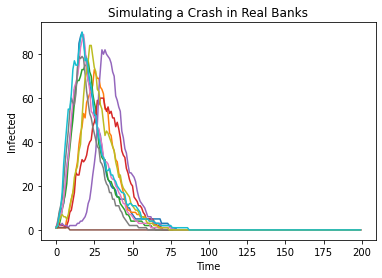

In [ ]:
#@title Real Banks
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[0], labels[19])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Real Banks")
plt.show()

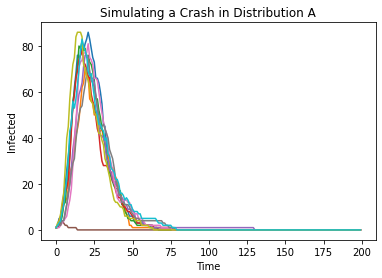

In [ ]:
#@title Distribution A
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[20], labels[42])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution A")
plt.show()

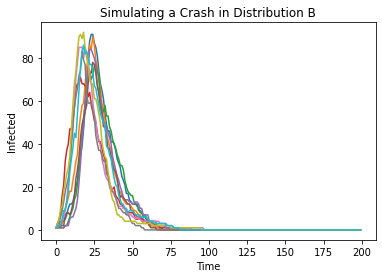

In [ ]:
#@title Distribution B
#Missing B3
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[43], labels[64])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution B")
plt.show()

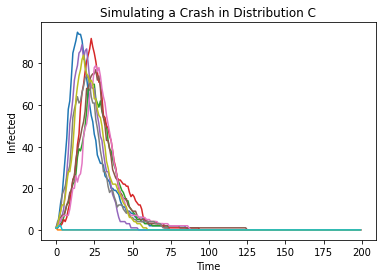

In [ ]:
#@title Distribution C
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[65], labels[87])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution C")
plt.show()

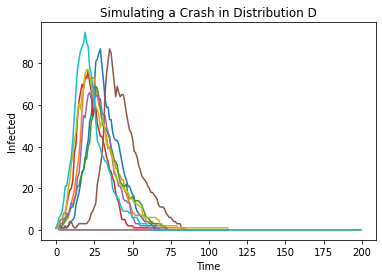

In [ ]:
#@title Distribution D
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[88], labels[110])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution D")
plt.show()

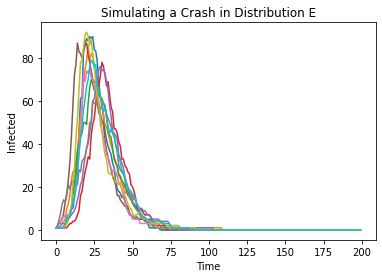

In [ ]:
#@title Distribution E
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[111], labels[132])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution E")
plt.show()

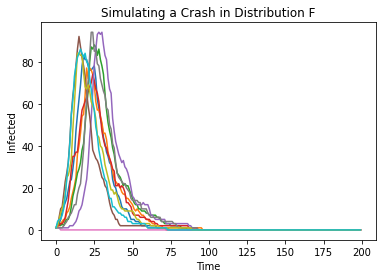

In [ ]:
#@title Distribution F
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[133], labels[154])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution F")
plt.show()

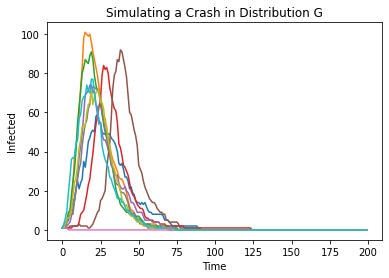

In [ ]:
#@title Distribution G
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[155], labels[176])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution G")
plt.show()

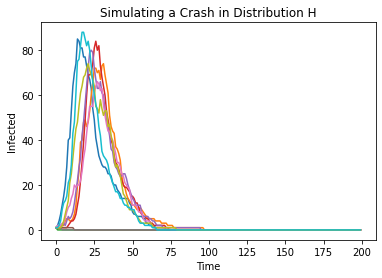

In [ ]:
#@title Distribution H
#Missing H22
import networkx as nx
import random
import math

A = nx.adjacency_matrix(G).todense()

labels = {}
for i in range(len(G.nodes)):
  if i in G.nodes:
    labels[i] = i

for i in range(10):
  j = random.randrange(labels[177], labels[192])
  trials = epi_sim(A, j)
  x = trials.sum(axis = 0)
  plt.plot(x)

plt.xlabel("Time")
plt.ylabel("Infected")
plt.title("Simulating a Crash in Distribution H")
plt.show()